# Importing modules and pre-requisites
3 zones selected,
North = Hamburg
West = Cologne
East = Cottbus

In [57]:
import pypsa
import pandapower as pp
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import warnings
import subprocess
from shapely.errors import ShapelyDeprecationWarning
import logging

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("pypsa.pf").setLevel(logging.WARNING)
plt.rc("figure", figsize=(10, 8))

### Create network and import data file

In [58]:
network = pypsa.Network()
network.set_snapshots(range(1))  # Solve for a year 365*24
type(network)
bus=pd.read_excel("C:\\Users\\onkar\\Desktop\\STUDY\\Market Integration of Renewable Sources\\PyPSA\\BTU_lectures_2024\\Lect_3\\data_exercise2.xlsx",sheet_name='buses',header=0)

### Import Buses

In [59]:
bus

,bus,v_nom,carrier,x,y,Unnamed: 5
0,north_de,380,AC,53.558459,9.763017,Hamburg
1,east_de,380,AC,51.778140,14.222498,Cottbus
2,west_de,380,AC,50.957587,6.802517,Cologne


In [60]:
network.madd(
    "Bus",
    names= bus.bus,
    v_nom=list(bus.v_nom),
    carrier=list(bus.carrier),  # MW
    x=list( bus.x),
    y=list(bus.y),
)
network.buses

C:\Users\onkar\AppData\Local\Temp\ipykernel_21048\3350768405.py:1: DeprecatedWarning: madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.
  network.madd(


,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
north_de,380.0,,53.558459,9.763017,AC,,1.0,0.0,inf,PQ,,
east_de,380.0,,51.778140,14.222498,AC,,1.0,0.0,inf,PQ,,
west_de,380.0,,50.957587,6.802517,AC,,1.0,0.0,inf,PQ,,


### Import Generators

In [61]:
generators=pd.read_excel("C:\\Users\\onkar\\Desktop\\STUDY\\Market Integration of Renewable Sources\\PyPSA\\BTU_lectures_2024\\Lect_3\\data_exercise2.xlsx",sheet_name='generators',header=0)

generators

,generator,p_nom,p_nom_max,bus,p_nom_extendable,marginal_cost,lifetime,efficiency,start_up_cost,shut_down_cost,min_up_time,min_down_time,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
0,gen_no1,31,31,north_de,True,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gen_ost1,19,19,east_de,True,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gen_west1,30,30,west_de,True,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
network.madd(
    "Generator",
    names= generators.generator,
    bus=list(generators.bus),
    carrier=list(generators.generator),
    p_nom=list(generators.p_nom),
    p_nom_extendable=list(generators.p_nom_extendable),
    marginal_cost=list(generators.marginal_cost),
)
network.generators

C:\Users\onkar\AppData\Local\Temp\ipykernel_21048\2744208940.py:1: DeprecatedWarning: madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.
  network.madd(


,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,e_sum_min,e_sum_max,q_set,sign,carrier,marginal_cost,marginal_cost_quadratic,active,build_year,lifetime,capital_cost,efficiency,committable,start_up_cost,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
gen_no1,north_de,PQ,,31.0,0.0,True,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_no1,10.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost1,east_de,PQ,,19.0,0.0,True,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_ost1,20.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west1,west_de,PQ,,30.0,0.0,True,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_west1,50.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


### Import Loads

In [63]:
load=pd.read_excel("C:\\Users\\onkar\\Desktop\\STUDY\\Market Integration of Renewable Sources\\PyPSA\\BTU_lectures_2024\\Lect_3\\data_exercise2.xlsx",sheet_name='load',header=0)

load

,line,bus,p_set
0,1,north_de,10
1,2,east_de,10
2,3,west_de,40


In [64]:
network.madd(
    "Load",
    names= load.bus,
    bus=list(load.bus),
    p_set=list(load.p_set),
)
network.loads

C:\Users\onkar\AppData\Local\Temp\ipykernel_21048\678921325.py:1: DeprecatedWarning: madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.
  network.madd(


,bus,carrier,type,p_set,q_set,sign,active
Load,,,,,,,
north_de,north_de,,,10.0,0.0,-1.0,True
east_de,east_de,,,10.0,0.0,-1.0,True
west_de,west_de,,,40.0,0.0,-1.0,True


### Import Trasmission Lines

In [65]:
lines=pd.read_excel("C:\\Users\\onkar\\Desktop\\STUDY\\Market Integration of Renewable Sources\\PyPSA\\BTU_lectures_2024\\Lect_3\\data_exercise2.xlsx",sheet_name='lines',header=0)

lines

,line,bus0,bus1,s_nom,s_nom_extendable,length,r,x
0,1,north_de,east_de,14,False,400,0.0001,0.0001
1,2,east_de,west_de,14,False,400,0.0001,0.0001
2,3,west_de,north_de,14,False,400,0.0001,0.0001


In [66]:
network.madd(
    "Line",
    names= lines.line,
    bus0=list(lines.bus0),
    bus1=list(lines.bus1),
    s_nom=list(lines.s_nom),
    s_nom_extendable=list(lines.s_nom_extendable),
    x=1,
)
network.lines

C:\Users\onkar\AppData\Local\Temp\ipykernel_21048\1607234303.py:1: DeprecatedWarning: madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.
  network.madd(


,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,s_nom_min,s_nom_max,s_max_pu,capital_cost,active,build_year,lifetime,length,carrier,terrain_factor,num_parallel,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,north_de,east_de,,1.0,0.0,0.0,0.0,14.0,0.0,False,0.0,inf,1.0,0.0,True,0,inf,0.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,east_de,west_de,,1.0,0.0,0.0,0.0,14.0,0.0,False,0.0,inf,1.0,0.0,True,0,inf,0.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,west_de,north_de,,1.0,0.0,0.0,0.0,14.0,0.0,False,0.0,inf,1.0,0.0,True,0,inf,0.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
network

PyPSA Network
Components:
 - Bus: 3
 - Generator: 3
 - Line: 3
 - Load: 3
Snapshots: 1

### Solve the network

In [68]:
network.optimize(solver_name="highs")

Index(['1', '2', '3'], dtype='object', name='Line')
Index(['1', '2', '3'], dtype='object', name='Line')
Index(['north_de', 'east_de', 'west_de'], dtype='object', name='Bus')
Index(['gen_no1', 'gen_ost1', 'gen_west1'], dtype='object', name='Generator')
Index(['1', '2', '3'], dtype='object', name='Line')
Index(['1', '2', '3'], dtype='object', name='Line')
Index(['north_de', 'east_de', 'west_de'], dtype='object', name='Bus')
Index(['gen_no1', 'gen_ost1', 'gen_west1'], dtype='object', name='Generator')
c:\Users\onkar\.conda\envs\pypsa\Lib\site-packages\linopy\common.py:147: UserWarning: coords for dimension(s) ['Generator'] is not aligned with the pandas object. Previously, the indexes of the pandas were ignored and overwritten in these cases. Now, the pandas object's coordinates are taken considered for alignment.
  warn(
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.solvers:Log file at C:\Users\onkar\AppData\Local\Temp\highs.log
INFO:

('ok', 'optimal')

In [69]:
network.generators_t.p

Generator,gen_no1,gen_ost1,gen_west1
snapshot,,,
0,24.0,24.0,12.0


In [70]:
network.lines_t.p0

Line,1,2,3
snapshot,,,
0,-0.0,14.0,-14.0


### Visualisation of Results

In [71]:
network.buses_t.marginal_price

clearing_price_redisp = network.buses_t.marginal_price.iloc[0].max()
clearing_price_redisp

50.0

In [72]:
network.generators_t.p

Generator,gen_no1,gen_ost1,gen_west1
snapshot,,,
0,24.0,24.0,12.0


In [73]:
flow = pd.Series(10, index=network.branches().index)
flow

component  name
Line       1       10
           2       10
           3       10
dtype: int64

<Axes: xlabel='Generator', ylabel='MW'>

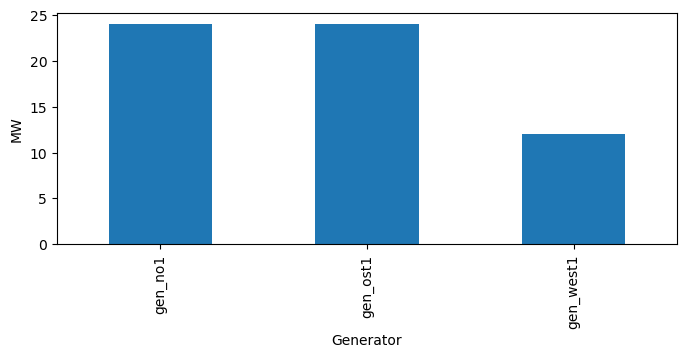

In [74]:
network.generators.p_nom_opt.plot.bar(ylabel="MW", figsize=(8, 3))

In [75]:
network.lines_t.p0

gen = network.generators.assign(g=network.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()
gen

bus       carrier  
east_de   gen_ost1     24.0
north_de  gen_no1      24.0
west_de   gen_west1    12.0
Name: g, dtype: float64

In [76]:
for line in network.lines.index:
    loading = abs(network.lines_t.p0.loc[:, line])  # Power flow in each line
    capacity = network.lines.at[line, "s_nom"]
    if loading.max() > capacity:
        print(f"Line {line} is overloaded. Max Loading: {loading.max()} GW, Capacity: {capacity} GW")
    else:
        print(f"Line {line} is within capacity.Max Loading: {loading.max()} GW, Capacity: {capacity} GW")

Line 1 is within capacity.Max Loading: 0.0 GW, Capacity: 14.0 GW
Line 2 is within capacity.Max Loading: 14.0 GW, Capacity: 14.0 GW
Line 3 is within capacity.Max Loading: 14.0 GW, Capacity: 14.0 GW
